In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import files



In [ ]:
#importing the datasets cross_sectional
cross_sectional=files.upload()

Saving oasis_cross-sectional.csv to oasis_cross-sectional.csv


In [ ]:
cross_sectional=pd.read_csv("oasis_cross-sectional.csv")
cross_sectional

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
431,OAS1_0285_MR2,M,R,20,NaN,NaN,NaN,NaN,1469,0.847,1.195,2.0
432,OAS1_0353_MR2,M,R,22,NaN,NaN,NaN,NaN,1684,0.790,1.042,40.0
433,OAS1_0368_MR2,M,R,22,NaN,NaN,NaN,NaN,1580,0.856,1.111,89.0
434,OAS1_0379_MR2,F,R,20,NaN,NaN,NaN,NaN,1262,0.861,1.390,2.0


In [ ]:
# Rename the 'ID' column to 'Subject ID' in the cross-sectional dataset
cross_sectional.rename(columns={'ID': 'Subject ID'}, inplace=True)


In [ ]:
# Assuming cross_sectional_df is your DataFrame
# Drop 63 rows
cross_sectional = cross_sectional.drop(cross_sectional.index[:63])

# After dropping rows, reset the index
cross_sectional = cross_sectional.reset_index(drop=True)


In [ ]:
cross_sectional.shape

(373, 12)

In [ ]:
# Check for missing values
print("\nMissing values in the dataset:")
print(cross_sectional.isnull().sum())



Missing values in the dataset:
Subject ID      0
M/F             0
Hand            0
Age             0
Educ          175
SES           190
MMSE          175
CDR           175
eTIV            0
nWBV            0
ASF             0
Delay         353
dtype: int64


In [ ]:
#handling the missing data
# Impute missing values with mean for numerical variables
cross_sectional['Educ'].fillna(cross_sectional['Educ'].mean(), inplace=True)
cross_sectional['SES'].fillna(cross_sectional['SES'].mean(), inplace=True)
cross_sectional['MMSE'].fillna(cross_sectional['MMSE'].mean(), inplace=True)
cross_sectional['CDR'].fillna(cross_sectional['CDR'].mean(), inplace=True)

# Impute missing values with mode for categorical variables
cross_sectional['M/F'].fillna(cross_sectional['M/F'].mode()[0], inplace=True)
cross_sectional['Hand'].fillna(cross_sectional['Hand'].mode()[0], inplace=True)

# Drop the 'Delay' column as it contains all missing values
cross_sectional.drop('Delay', axis=1, inplace=True)

# Check if there are any remaining missing values
print("Remaining missing values in the dataset:")
print(cross_sectional.isnull().sum())


Remaining missing values in the dataset:
Subject ID    0
M/F           0
Hand          0
Age           0
Educ          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64


In [ ]:
# Display summary statistics
print("Summary Statistics:")
print(cross_sectional.describe())


Summary Statistics:
              Age        Educ         SES        MMSE         CDR  \
count  373.000000  373.000000  373.000000  373.000000  373.000000   
mean    51.080429    3.196970    2.469945   27.015152    0.272727   
std     25.316576    0.949417    0.778724    2.754739    0.278112   
min     18.000000    1.000000    1.000000   14.000000    0.000000   
25%     23.000000    3.000000    2.000000   27.015152    0.000000   
50%     54.000000    3.196970    2.469945   27.015152    0.272727   
75%     74.000000    3.196970    2.469945   29.000000    0.272727   
max     96.000000    5.000000    5.000000   30.000000    2.000000   

              eTIV        nWBV         ASF  
count   373.000000  373.000000  373.000000  
mean   1484.289544    0.792954    1.195877  
std     158.527386    0.059341    0.127728  
min    1123.000000    0.644000    0.881000  
25%    1373.000000    0.745000    1.111000  
50%    1478.000000    0.809000    1.187000  
75%    1579.000000    0.843000    1.279000 

# Exploratory Data Analysis

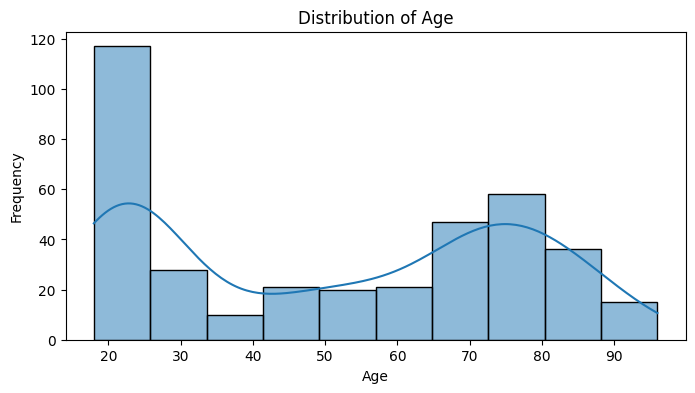

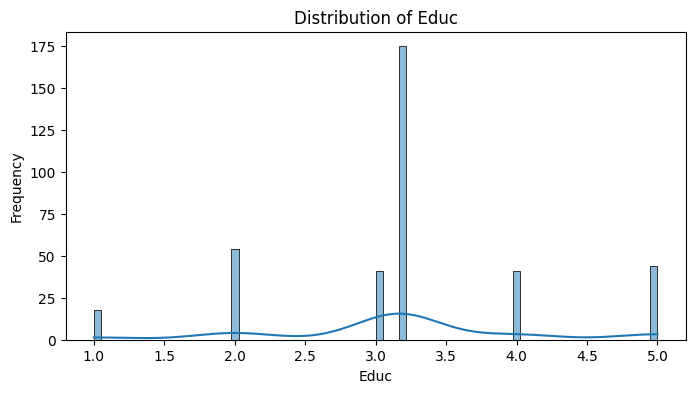

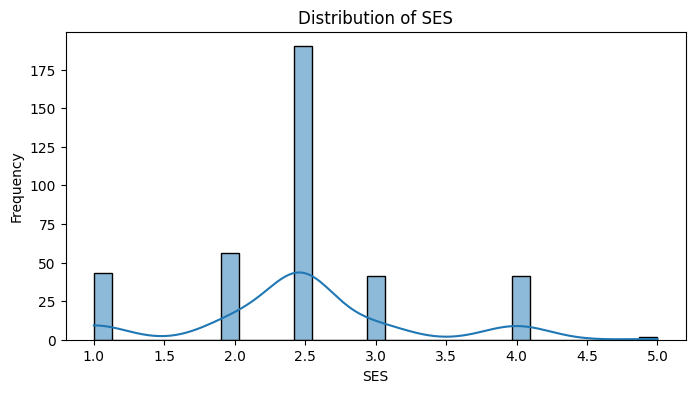

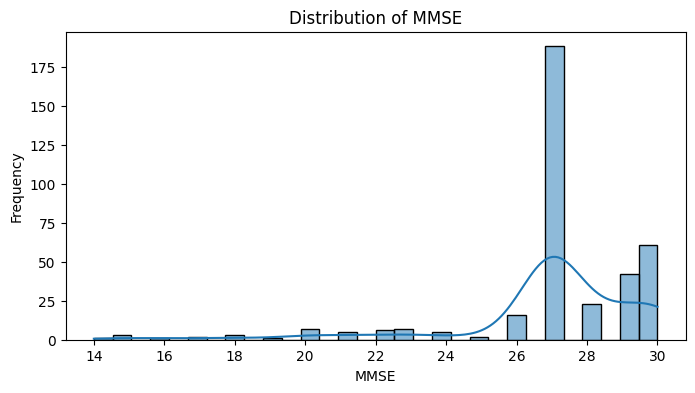

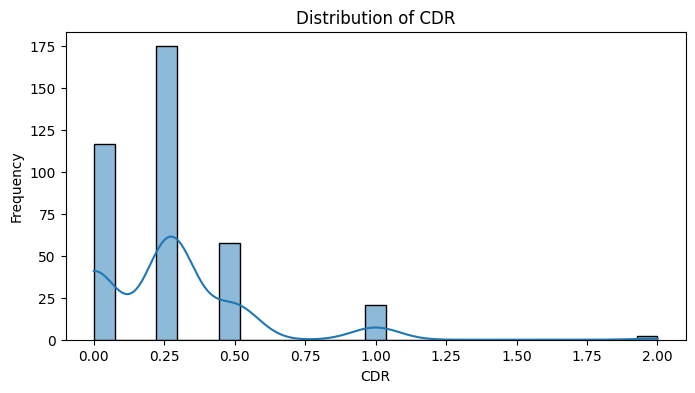

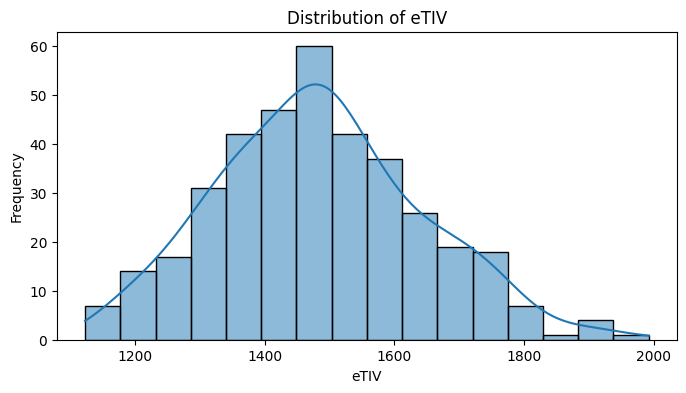

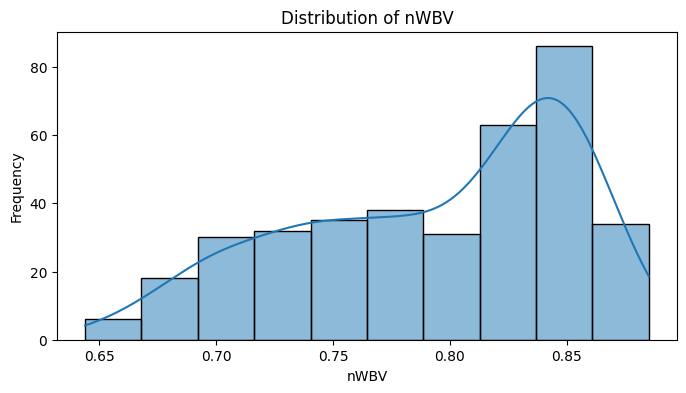

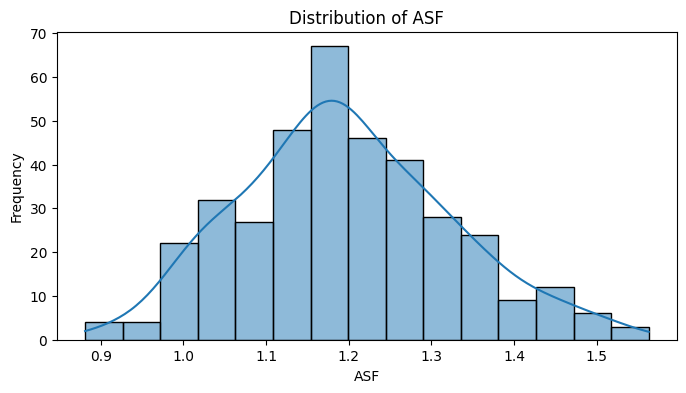

In [ ]:
# Visualize the distribution of numerical variables
num_vars = ['Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
for var in num_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(cross_sectional[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

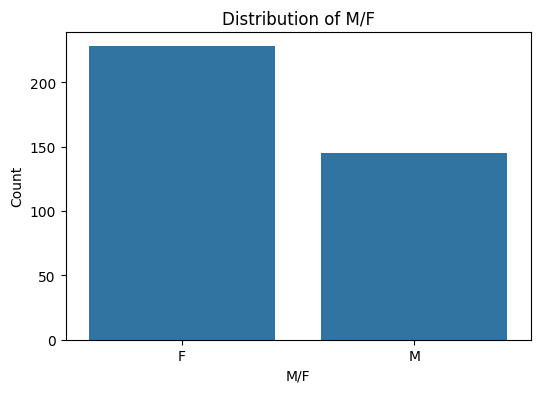

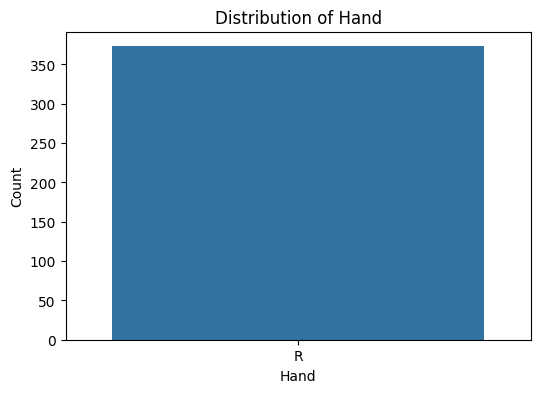

In [ ]:
# Visualize the distribution of categorical variables
cat_vars = ['M/F', 'Hand']
for var in cat_vars:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=cross_sectional, x=var)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()


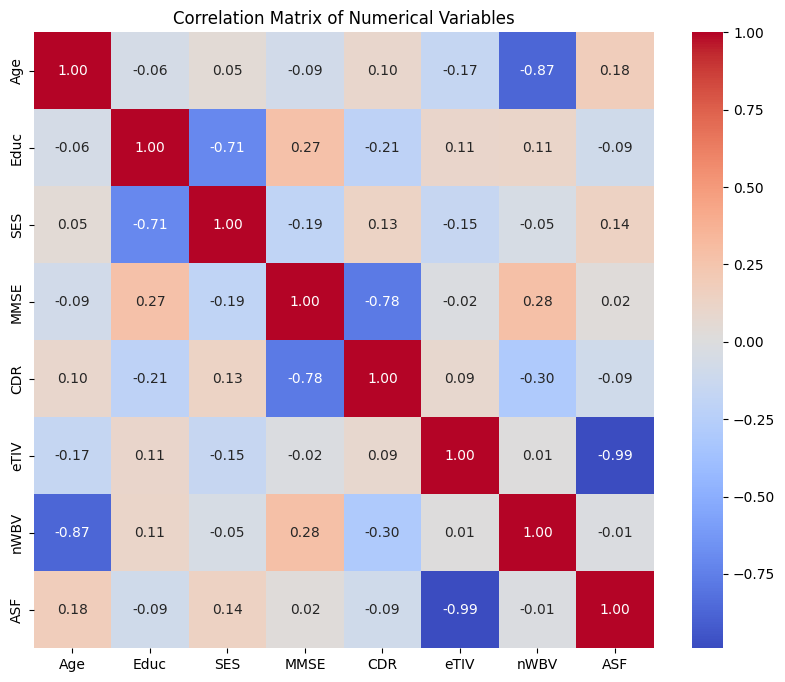

In [ ]:
# Explore relationships between numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(cross_sectional[num_vars].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


# Longitudinal MRI data

In [ ]:
#importing the longitdinal
log=files.upload()

Saving oasis_longitudinal.csv to oasis_longitudinal.csv


In [ ]:
#importing the datasets longitudinal
log=pd.read_csv("oasis_longitudinal.csv")
log

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [ ]:
# Count the number of unique groups in the "Group" column
group_counts = log['Group'].value_counts()
group_counts


Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64

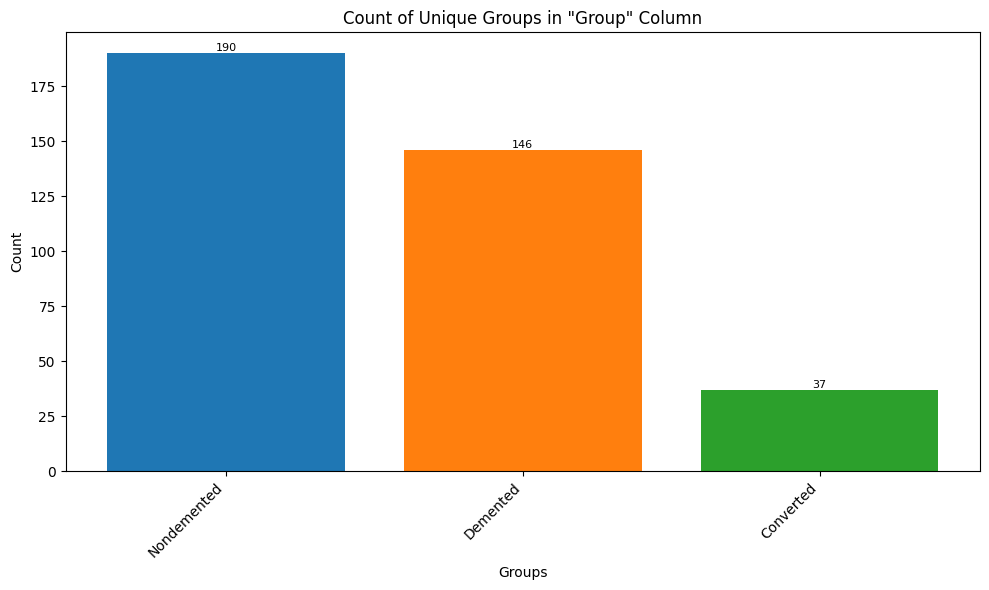

In [ ]:
num_groups = len(group_counts)
colors = plt.cm.tab10(np.arange(num_groups))

# Create a bar plot with custom colors and data labels
plt.figure(figsize=(10, 6))
bars = plt.bar(group_counts.index, group_counts.values, color=colors)

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=8)

plt.title('Count of Unique Groups in "Group" Column')
plt.xlabel('Groups')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
log.shape

(373, 15)

In [ ]:
#checking for missing values
log.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [ ]:

# Handle missing values (for example, fill missing values with the mean)
log.fillna(log.mean(), inplace=True)


<ipython-input-17-517bb26e9863>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  log.fillna(log.mean(), inplace=True)


In [ ]:

# Normalize numerical features
numerical_cols = ['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
log[numerical_cols] = (log[numerical_cols] - log[numerical_cols].mean()) / log[numerical_cols].std()

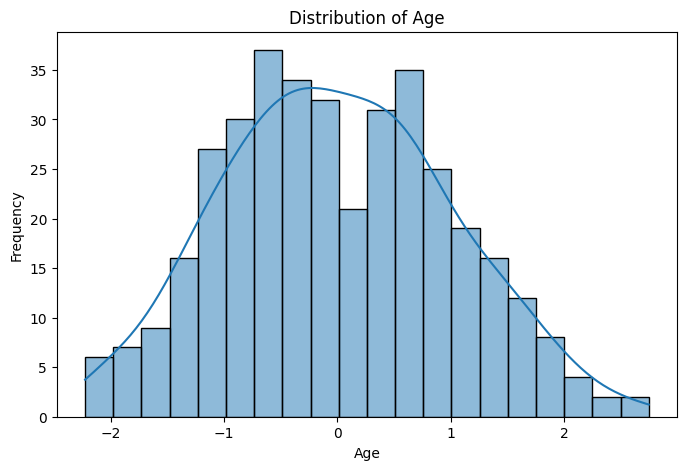

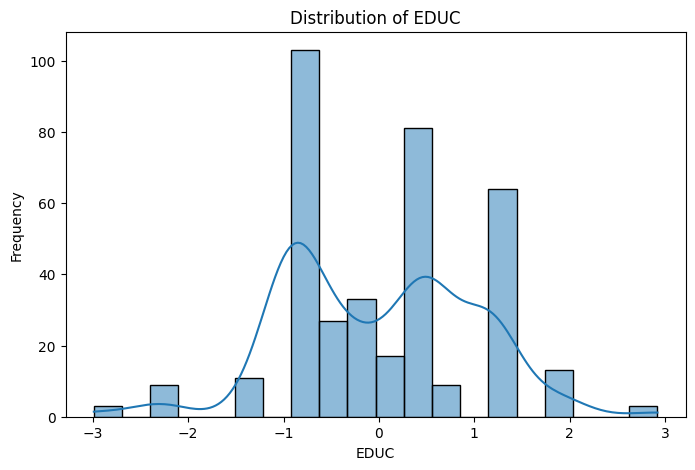

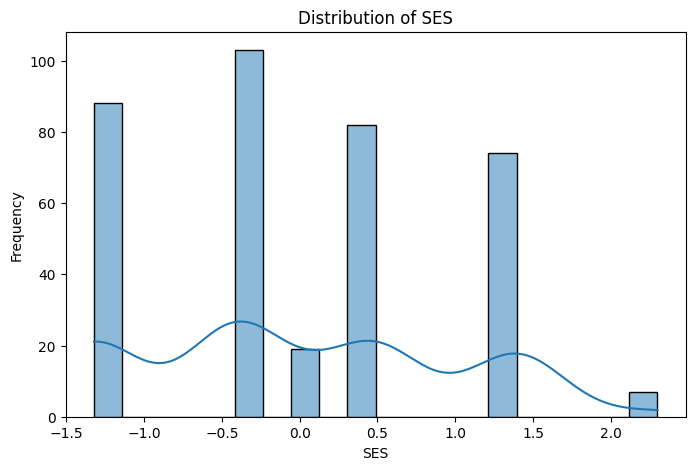

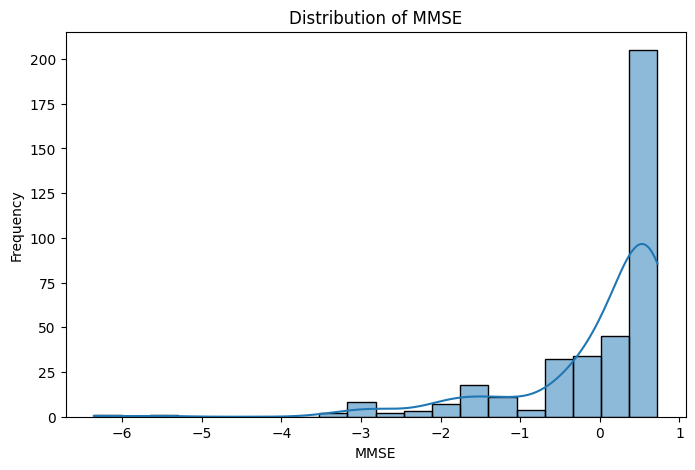

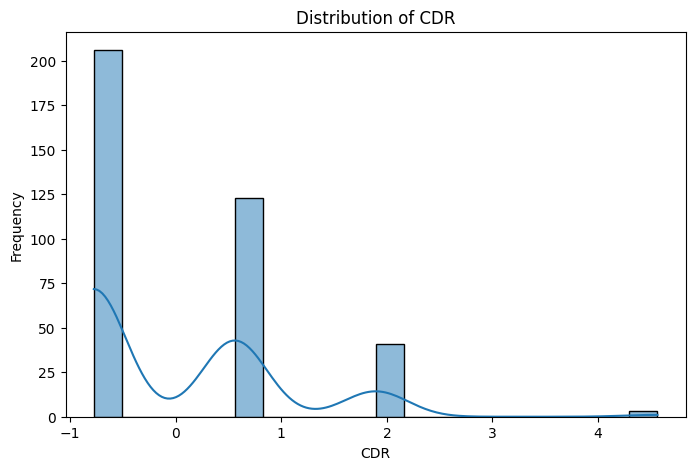

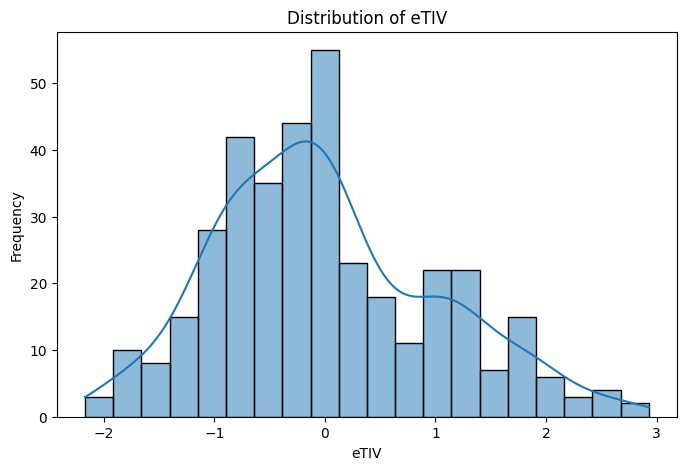

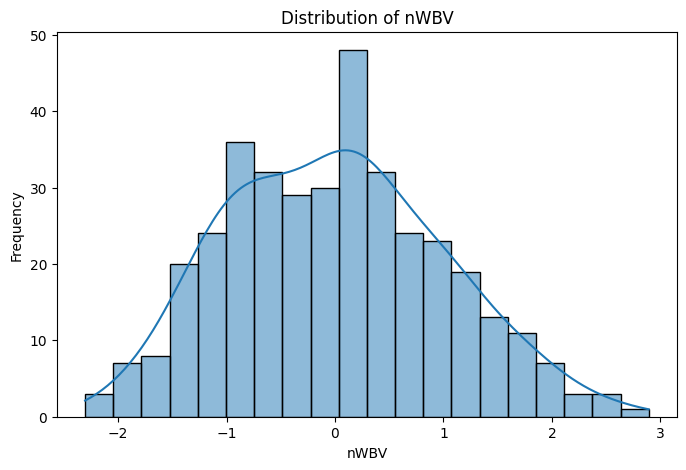

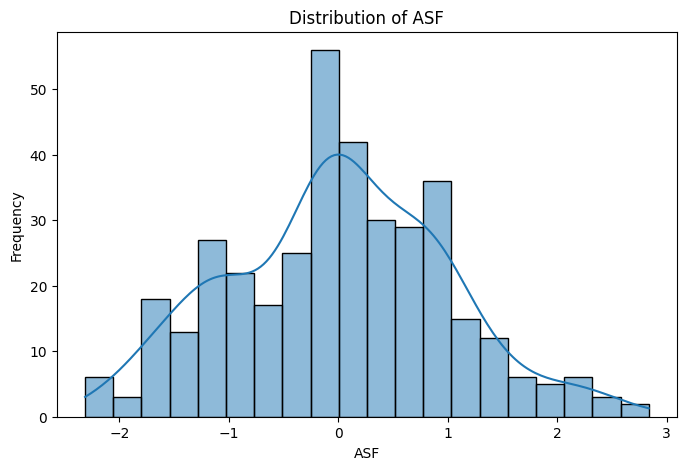

In [ ]:
# Data distribution - Histograms
numerical_cols = ['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(log[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

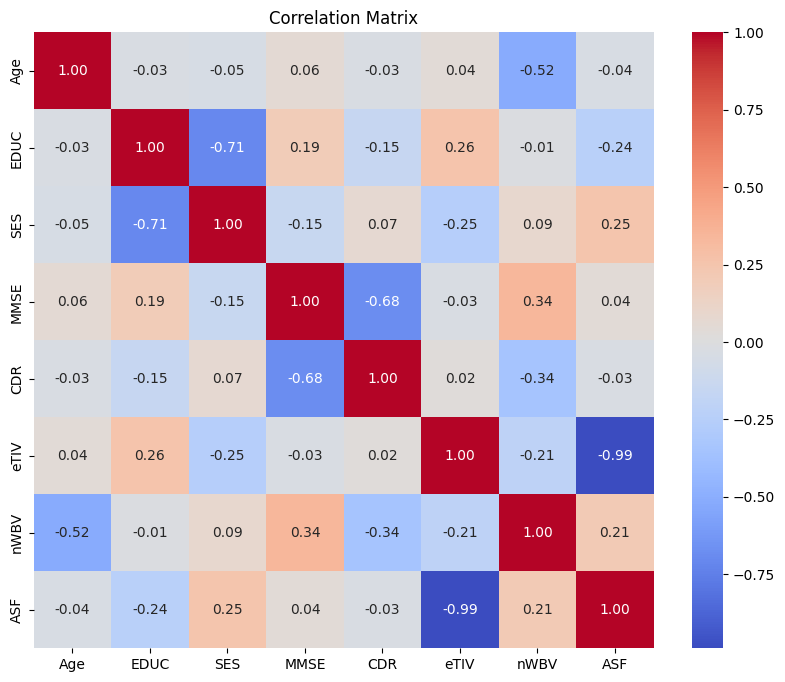

In [ ]:
# Correlation analysis - Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(log[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


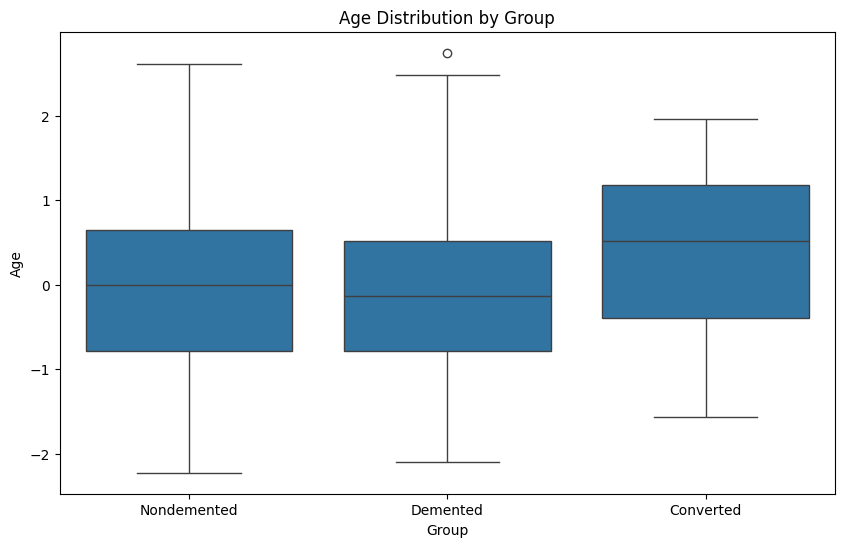

In [ ]:
# Group comparison - Box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Age', data=log)
plt.title('Age Distribution by Group')
plt.xlabel('Group')
plt.ylabel('Age')
plt.show()


In [ ]:
log.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [ ]:
cross_sectional.columns

Index(['Subject ID', 'M/F', 'Hand', 'Age', 'Educ', 'SES', 'MMSE', 'CDR',
       'eTIV', 'nWBV', 'ASF'],
      dtype='object')

# Merging the two datasets

In [ ]:
# Extract features from the cross-sectional dataset
cross_sectional_features = cross_sectional[['Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]

# Extract features from the log dataset
log_features = log[['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]

# Combine the extracted features into a single feature matrix
combined_features = pd.concat([cross_sectional_features, log_features], axis=0, ignore_index=True)

# Reduce the number of rows to 373
combined_features = combined_features[:373]

# Display the combined feature matrix
print("Combined Features:")
print(combined_features.head())


Combined Features:
    Age  Educ  SES  MMSE  CDR    eTIV   nWBV    ASF  EDUC
0  67.0   3.0  4.0  30.0  0.0  1508.0  0.805  1.164   NaN
1  33.0   4.0  1.0  30.0  0.0  1709.0  0.784  1.027   NaN
2  63.0   3.0  2.0  30.0  0.0  1327.0  0.801  1.323   NaN
3  49.0   5.0  1.0  30.0  0.0  1459.0  0.808  1.203   NaN
4  60.0   5.0  1.0  30.0  0.0  1402.0  0.823  1.252   NaN


In [ ]:
cross_sectional[['Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']].shape

(373, 8)

In [ ]:
cross_sectional_features.head(5)

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,67,3.0,4.0,30.0,0.0,1508,0.805,1.164
1,33,4.0,1.0,30.0,0.0,1709,0.784,1.027
2,63,3.0,2.0,30.0,0.0,1327,0.801,1.323
3,49,5.0,1.0,30.0,0.0,1459,0.808,1.203
4,60,5.0,1.0,30.0,0.0,1402,0.823,1.252


In [ ]:
#target_variable
target_variable = log['Group']
target_variable.shape

(373,)

In [ ]:
combined_features.shape

(373, 9)

# Performing Early Fusion

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_features, target_variable, test_size=0.2, random_state=42)

In [ ]:
# Preprocess the data to handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Instantiate the classifiers
rf_classifier = RandomForestClassifier()
nb_classifier = GaussianNB()
knn_classifier = KNeighborsClassifier()
svm_classifier = SVC()

# Train the classifiers
rf_classifier.fit(X_train_scaled, y_train)
nb_classifier.fit(X_train_scaled, y_train)
knn_classifier.fit(X_train_scaled, y_train)
svm_classifier.fit(X_train_scaled, y_train)

# Evaluate the classifiers
rf_accuracy = rf_classifier.score(X_test_scaled, y_test)
nb_accuracy = nb_classifier.score(X_test_scaled, y_test)
knn_accuracy = knn_classifier.score(X_test_scaled, y_test)
svm_accuracy = svm_classifier.score(X_test_scaled, y_test)

print("Random Forest Accuracy:", rf_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("SVM Accuracy:", svm_accuracy)


Random Forest Accuracy: 0.48
Naive Bayes Accuracy: 0.41333333333333333
KNN Accuracy: 0.36
SVM Accuracy: 0.4


# HyperParameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best Score: 0.563502824858757


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
# Define hyperparameters for SVM
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Perform Grid Search Cross Validation
svm_grid_search = GridSearchCV(SVC(), svm_param_grid, cv=5, n_jobs=-1)
svm_grid_search.fit(X_train_scaled, y_train)

# Print best parameters and best score
print("Best Parameters for SVM:", svm_grid_search.best_params_)
print("Best Score for SVM:", svm_grid_search.best_score_)


Best Parameters for SVM: {'C': 0.1, 'kernel': 'poly'}
Best Score for SVM: 0.5335593220338983


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Define hyperparameters for Decision Trees
dt_param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search Cross Validation for Decision Trees
dt_grid_search = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5, n_jobs=-1)
dt_grid_search.fit(X_train_scaled, y_train)

# Print best parameters and best score for Decision Trees
print("Best Parameters for Decision Trees:", dt_grid_search.best_params_)
print("Best Score for Decision Trees:", dt_grid_search.best_score_)

# Define hyperparameters for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

# Perform Grid Search Cross Validation for Gradient Boosting
gb_grid_search = GridSearchCV(GradientBoostingClassifier(), gb_param_grid, cv=5, n_jobs=-1)
gb_grid_search.fit(X_train_scaled, y_train)

# Print best parameters and best score for Gradient Boosting
print("Best Parameters for Gradient Boosting:", gb_grid_search.best_params_)
print("Best Score for Gradient Boosting:", gb_grid_search.best_score_)


Best Parameters for Decision Trees: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score for Decision Trees: 0.5203389830508475
Best Parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}
Best Score for Gradient Boosting: 0.5804519774011299
